<a href="https://colab.research.google.com/github/Raviiitk25/demo-repository/blob/main/Predicting_Car_Price_Based_on_Age_Using_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inside notebook
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/quikr_car.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
import numpy as np

# Make a copy of the original data
car = df.copy()

# Drop rows with missing values and duplicates
car.dropna(inplace=True)
car.drop_duplicates(inplace=True)

# Step 1: Clean 'Price' column
car['Price'] = car['Price'].astype(str)  # ensure it's string
car = car[~car['Price'].str.contains("Ask For Price")]  # remove unwanted text
car['Price'] = car['Price'].str.replace(',', '')
car = car[car['Price'].str.isnumeric()]  # keep only numeric rows
car['Price'] = car['Price'].astype(int)  # now safe to convert

# Step 2: Clean 'kms_driven' column
car['kms_driven'] = car['kms_driven'].astype(str)
car['kms_driven'] = car['kms_driven'].str.replace(' kms', '').str.replace(',', '')
car = car[car['kms_driven'].str.isnumeric()]
car['kms_driven'] = car['kms_driven'].astype(int)

# Step 3: Clean 'year' and create Car_Age
car['year'] = pd.to_numeric(car['year'], errors='coerce')
car = car[car['year'] < 2025]  # remove future years
car['Car_Age'] = 2025 - car['year']

# Final dataset with only Car Age and Price
final_data = car[['Car_Age', 'Price']]
final_data.dropna(inplace=True)
final_data.reset_index(drop=True, inplace=True)

# Show first few rows
final_data.head()

/tmp/ipython-input-5-3470293390.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.dropna(inplace=True)


,Car_Age,Price
0,18,80000
1,19,425000
2,11,325000
3,11,575000
4,13,175000


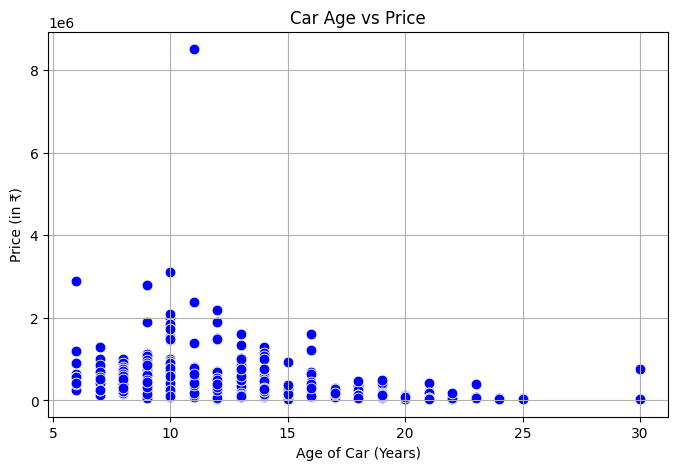

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Car Age vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Car_Age', y='Price', data=final_data, color='blue', s=60)
plt.title('Car Age vs Price')
plt.xlabel('Age of Car (Years)')
plt.ylabel('Price (in ₹)')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare X and y
X = final_data[['Car_Age']]  # independent variable (2D)
y = final_data['Price']      # dependent variable

# Create and train model
model = LinearRegression()
model.fit(X, y)

# Print slope and intercept
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

# Regression Equation
print(f"\nRegression Equation: Price = {model.coef_[0]:.2f} * Car_Age + {model.intercept_:.2f}")

Slope (m): -34083.75934491131
Intercept (c): 835364.9903687029

Regression Equation: Price = -34083.76 * Car_Age + 835364.99


In [ ]:
# Predict the price of a brand-new car (age = 0)
predicted_price = model.predict([[0]])
print(f"Predicted price of a brand new car (Age 0): ₹{predicted_price[0]:,.2f}")

Predicted price of a brand new car (Age 0): ₹835,364.99


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


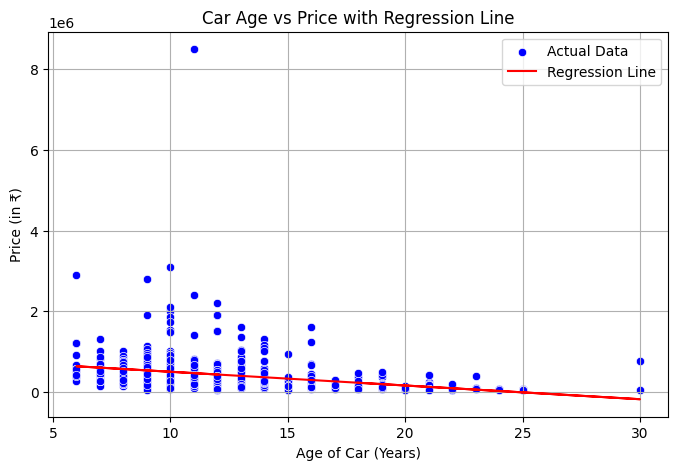

In [ ]:
# Plot the data and the regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Car_Age', y='Price', data=final_data, color='blue', label='Actual Data')
plt.plot(final_data['Car_Age'], model.predict(final_data[['Car_Age']]), color='red', label='Regression Line')

plt.title('Car Age vs Price with Regression Line')
plt.xlabel('Age of Car (Years)')
plt.ylabel('Price (in ₹)')
plt.legend()
plt.grid(True)
plt.show()